<h1 style="text-align: center;">
  <b>Análise Exploratória Multivariada para a Área do Marketing</b>
</h1>

<h3 style="text-align: justify;">
  Script desenvolvido para identificar fatores que ajudem a explicar porque um cliente aceita ou não uma campanha de Marketing e realiza a compra de determinados produtos.
</h3>

<p style='text-align: justify;'>
  Os dados utilizados para esse projeto estão disponíveis no Kaggle no link abaixo, e contém as seguintes variáveis:
</p>

<ol style="text-align: justify;">
  <li><b>ID</b>: Identificador único do cliente.</li>
  <li><b>Ano_Nascimento</b>: Ano de nascimento do cliente.</li>
  <li><b>Educacao</b>: Nível de educação do cliente (ex.: Graduação, PhD).</li>
  <li><b>Estado_Civil</b>: Estado civil do cliente (ex.: Casado, Solteiro).</li>
  <li><b>Renda</b>: Renda anual do cliente em reais.</li>
  <li><b>Criancas_Em_Casa</b>: Número de crianças pequenas na casa do cliente.</li>
  <li><b>Adolescentes_Em_Casa</b>: Número de adolescentes na casa do cliente.</li>
  <li><b>Data_Cadastro_Cliente</b>: Data em que o cliente foi cadastrado na empresa.</li>
  <li><b>Gasto_Vinhos</b>: Total gasto em vinhos no último ano.</li>
  <li><b>Gasto_Frutas</b>: Total gasto em frutas no último ano.</li>
  <li><b>Gasto_Carnes</b>: Total gasto em carnes no último ano.</li>
  <li><b>Gasto_Peixes</b>: Total gasto em peixes no último ano.</li>
  <li><b>Gasto_Doces</b>: Total gasto em doces no último ano.</li>
  <li><b>Gasto_Outros</b>: Total gasto em outros produtos no último ano.</li>
  <li><b>Num_Compras_Desconto</b>: Número de compras feitas com desconto.</li>
  <li><b>Num_Compras_Web</b>: Número de compras feitas através da web.</li>
  <li><b>Num_Compras_Catalogo</b>: Número de compras feitas usando um catálogo.</li>
  <li><b>Num_Compras_Loja</b>: Número de compras feitas diretamente na loja.</li>
  <li><b>Num_Visitas_Web_Mes</b>: Número de visitas ao site da empresa por mês.</li>
  <li><b>Aceitou_Campanha_1</b>: Indica se o cliente aceitou a oferta na primeira campanha (0 = Não, 1 = Sim).</li>
  <li><b>Aceitou_Campanha_2</b>: Indica se o cliente aceitou a oferta na segunda campanha (0 = Não, 1 = Sim).</li>
  <li><b>Aceitou_Campanha_3</b>: Indica se o cliente aceitou a oferta na terceira campanha (0 = Não, 1 = Sim).</li>
  <li><b>Aceitou_Campanha_4</b>: Indica se o cliente aceitou a oferta na quarta campanha (0 = Não, 1 = Sim).</li>
  <li><b>Aceitou_Campanha_5</b>: Indica se o cliente aceitou a oferta na quinta campanha (0 = Não, 1 = Sim).</li>
  <li><b>Aceitou_Campanha_6</b>: Indica se o cliente aceitou a oferta na sexta campanha (0 = Não, 1 = Sim).</li>
</ol>

<p style="text-align: justify;">
  <b>Dados disponíveis em:</b><br>
  <a href="https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign" target="_blank">Kaggle: Campanha de Marketing</a>
</p>


In [1]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michela Camboim" 

Author: Michela Camboim



## Carregando os Dados

In [3]:
# Carrega o dataset

# Configurar o Pandas para exibir até 25 colunas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 40)


df = pd.read_csv("dataset.csv")

print(f'Shape: ', df.shape)
df.head()

Shape:  (2237, 25)


,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,Num_Compras_Promocionais,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,57,10,28,14,1,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,7,2,1,2,2,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,559,63,9,67,1,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,348,76,32,90,2,5,2,12,2,0,0,0,0,0,0


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

<p style="text-align: justify;">________________________________________________________________________________________________________________________</p>

# Parte 1: Limpeza e Processamento Inicial dos Dados

<p style="text-align: justify;">________________________________________________________________________________________________________________________</p>

In [5]:
# Remover o espaço extra nos títulos das colunas
df.columns = df.columns.str.replace(' ', '') 

In [6]:
# A variável Renda tem o caracter $. Remover esse caracter especial para ter a coluna como numérica
df['Renda'] = df['Renda'].str.replace('$', '').str.replace(',', '').astype(float) 

In [7]:
# A coluna de data está como tipo object. Vamos converter para o tipo datetime
df['Data_Cadastro_Cliente'] = pd.to_datetime(df['Data_Cadastro_Cliente']) 

In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2237 non-null   int64         
 1   Ano_Nascimento            2237 non-null   int64         
 2   Educacao                  2237 non-null   object        
 3   Estado_Civil              2237 non-null   object        
 4   Renda                     2213 non-null   float64       
 5   Criancas_Em_Casa          2237 non-null   int64         
 6   Adolescentes_Em_Casa      2237 non-null   int64         
 7   Data_Cadastro_Cliente     2237 non-null   datetime64[ns]
 8   Gasto_Vinhos              2237 non-null   int64         
 9   Gasto_Frutas              2237 non-null   int64         
 10  Gasto_Carnes              2237 non-null   int64         
 11  Gasto_Peixes              2237 non-null   int64         
 12  Gasto_Doces         

In [9]:
# Amostra dos dados
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,Num_Compras_Promocionais,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,28,14,1,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,1,2,2,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,9,67,1,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,32,90,2,5,2,12,2,0,0,0,0,0,0


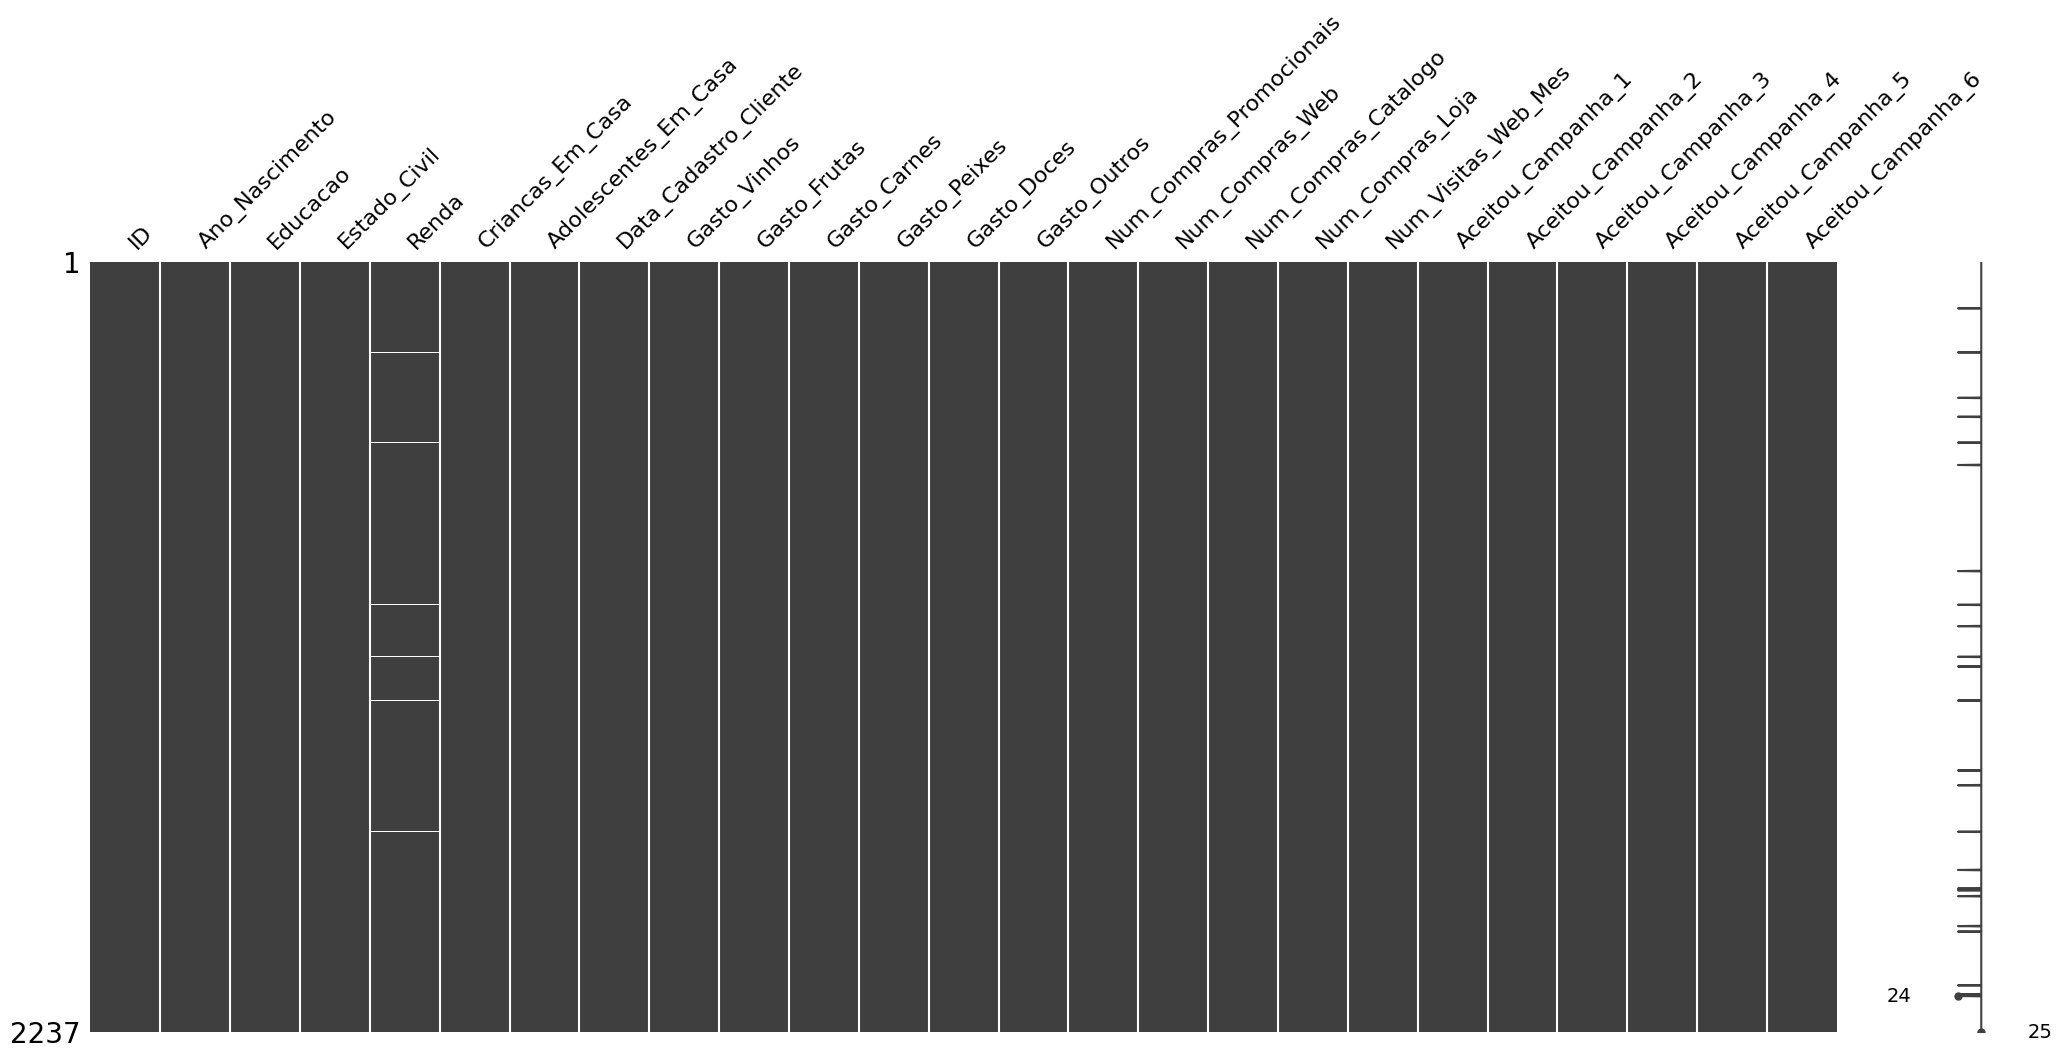

In [10]:
# Matriz de valores ausentes
msno.matrix(df)
plt.show()

In [11]:
# Soma de valores ausentes
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [12]:
# Filtramos pelas que são diferentes de zero
print(valores_ausentes.loc[valores_ausentes != 0])

Renda    24
dtype: int64


<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Para tratar os valores ausentes, é necessário checar primeiro se há outliers na variável, o que ajudará a tomar a decisão ideal de tratamento dos valores ausentes.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>


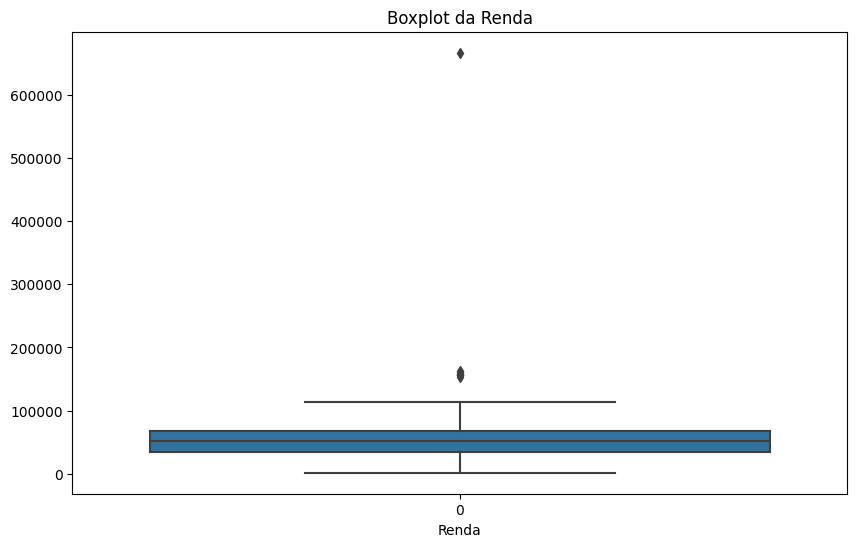

In [13]:
# Visualizar se há outliers na coluna 'Renda' por meio do boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(df['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Sim, parece haver outliers. Vamos nos certificar usando a regra estatística.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

In [14]:
# Calculando o IQR para a coluna 'Renda'
Q1 = df['Renda'].quantile(0.25)
Q3 = df['Renda'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Definindo os limites para considerar um ponto como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Identificando os outliers
outliers = df[(df['Renda'] < lower_bound) | (df['Renda'] > upper_bound)]
outliers

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,Num_Compras_Promocionais,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
325,4931,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0


<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Checando a distribuição da variável.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

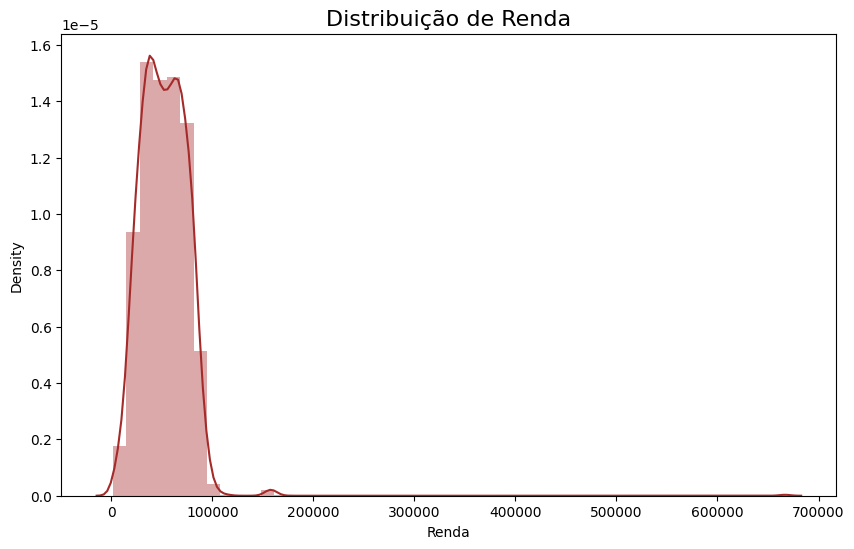

In [17]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Como são poucos registros, a decisão é removê-los.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

In [18]:
# Filtrando o dataframe e removendo os outliers
df = df[(df['Renda'] >= lower_bound) & (df['Renda'] <= upper_bound)]

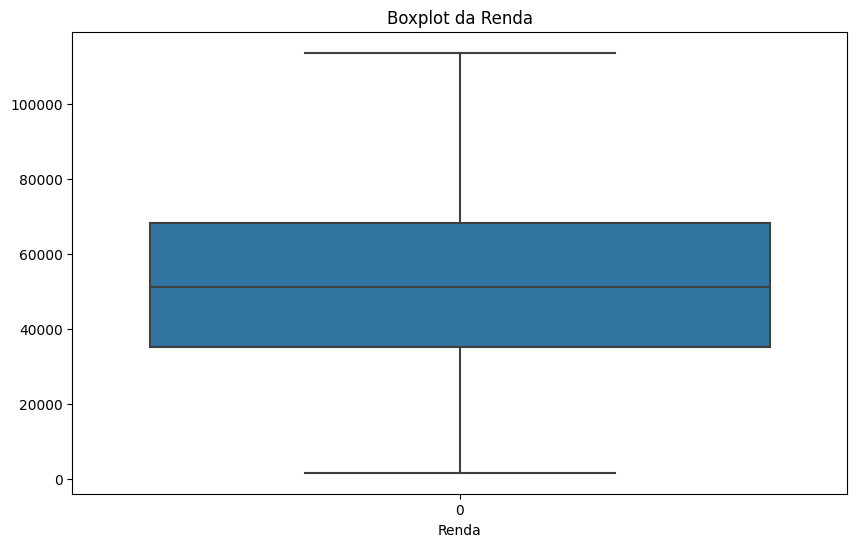

In [19]:
# Visualizar se há outliers na coluna 'Renda' após a eliminação dos outliers
plt.figure(figsize = (10, 6))
sns.boxplot(df['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

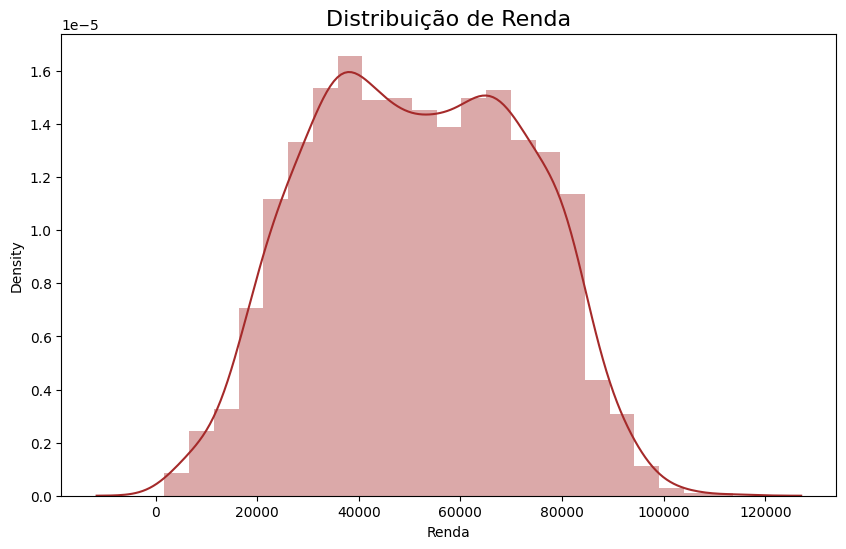

In [20]:
# Visualizando a distribuição da renda sem outliers
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Estratégia escolhida para tratamento de valores ausentes: KNNInputer do SKlearn.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

In [21]:
# Normaliza os dados antes de aplicar o KNNImputer (opcional, mas recomendado)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Renda']])

In [22]:
# Cria o KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [23]:
# Imputa os valores ausentes com o imputer
data_imputed = imputer.fit_transform(data_scaled)

In [24]:
# Converter de volta para o formato original 
df['Renda'] = scaler.inverse_transform(data_imputed)

In [25]:
print('Total de Valores Ausentes:', df.isnull().sum().sum())

Total de Valores Ausentes: 0


In [26]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,Num_Compras_Promocionais,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,28,14,1,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,1,2,2,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,9,67,1,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,32,90,2,5,2,12,2,0,0,0,0,0,0


## Análise Exploratória e Engenharia de Atributos

In [27]:
# Colunas
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6'],
      dtype='object')

In [28]:
# Drop (em memória) das colunas categóricas para criar o box plot das colunas quantitativas
data_boxplot = df.drop(columns = ['ID',
                                      'Educacao',
                                      'Estado_Civil',
                                      'Criancas_Em_Casa',
                                      'Data_Cadastro_Cliente',
                                      'Adolescentes_Em_Casa', 
                                      'Aceitou_Campanha_1', 
                                      'Aceitou_Campanha_2',
                                      'Aceitou_Campanha_3', 
                                      'Aceitou_Campanha_4', 
                                      'Aceitou_Campanha_5',
                                      'Aceitou_Campanha_6'])

In [29]:
data_boxplot.columns

Index(['Ano_Nascimento', 'Renda', 'Gasto_Vinhos', 'Gasto_Frutas',
       'Gasto_Carnes', 'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes'],
      dtype='object')

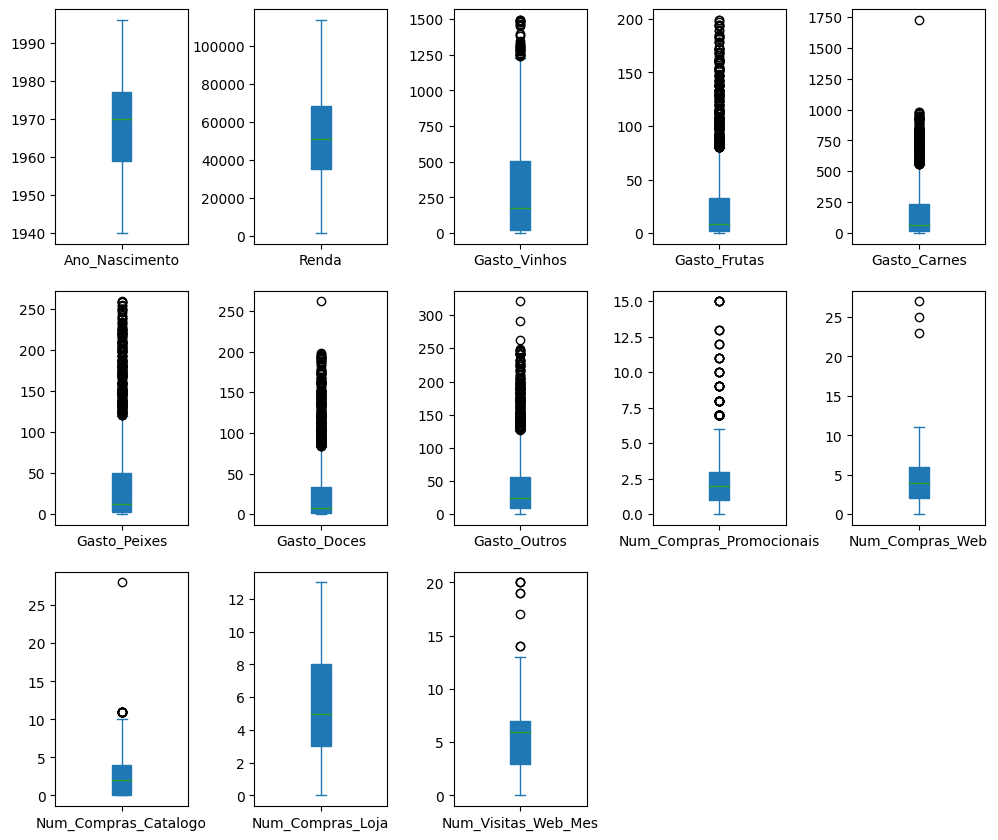

In [30]:
# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Aplicando engenharia de atributos para ajudar na exploração dos dados.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

In [31]:
# Vamos criar uma nova coluna com a idade de cada cliente (ano atual - ano de nascimento)
ano_atual = datetime.now().year
df['Idade'] = ano_atual - df['Ano_Nascimento']

In [32]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Compras_Promocionais,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,1,1,1,6,2,0,0,0,0,0,0,47
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,1,7,7,12,3,0,0,0,0,0,0,64
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,2,1,0,3,4,0,0,0,0,0,0,54
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,1,4,6,4,2,0,0,0,0,0,0,55
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,2,5,2,12,2,0,0,0,0,0,0,45


In [33]:
# Criaremos uma coluna com o número de dias como cliente desde a data de cadastro
df['Dias_Como_Cliente'] = df['Data_Cadastro_Cliente'].max() - df['Data_Cadastro_Cliente']

In [34]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,1,1,6,2,0,0,0,0,0,0,47,255 days
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,7,7,12,3,0,0,0,0,0,0,64,259 days
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,1,0,3,4,0,0,0,0,0,0,54,1294 days
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,4,6,4,2,0,0,0,0,0,0,55,272 days
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,5,2,12,2,0,0,0,0,0,0,45,2665 days


In [35]:
# Removeremos a palavra "days" ao final do valor de cada linha da coluna Dias_Como_Cliente
df['Dias_Como_Cliente'] = df['Dias_Como_Cliente'].astype(str).str.replace(' days', '')

In [36]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,1,1,6,2,0,0,0,0,0,0,47,255
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,7,7,12,3,0,0,0,0,0,0,64,259
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,1,0,3,4,0,0,0,0,0,0,54,1294
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,4,6,4,2,0,0,0,0,0,0,55,272
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,5,2,12,2,0,0,0,0,0,0,45,2665


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces         

In [38]:
# Ajusta o tipo de dado da variável Dias_Como_Cliente
df['Dias_Como_Cliente'] = pd.to_numeric(df['Dias_Como_Cliente'], downcast = 'integer')

In [39]:
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces         

In [41]:
# Cria uma variável com o Total de Compras realizadas nos 3 diferentes canais
df['TotalCompras'] = df['Num_Compras_Web'] + df['Num_Compras_Catalogo'] + df['Num_Compras_Loja']

In [42]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,1,6,2,0,0,0,0,0,0,47,255,8
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,7,12,3,0,0,0,0,0,0,64,259,26
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,0,3,4,0,0,0,0,0,0,54,1294,4
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,6,4,2,0,0,0,0,0,0,55,272,14
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,2,12,2,0,0,0,0,0,0,45,2665,19


In [43]:
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras'],
      dtype='object')

In [44]:
# Cria a variável Gasto_Total com o somatório de todas as colunas que começam com o nome Gasto
df['Gasto_Total'] = df.filter(like = 'Gasto').sum(axis=1)

In [45]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,6,2,0,0,0,0,0,0,47,255,8,162
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,12,3,0,0,0,0,0,0,64,259,26,1123
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,3,4,0,0,0,0,0,0,54,1294,4,17
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,4,2,0,0,0,0,0,0,55,272,14,1044
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,12,2,0,0,0,0,0,0,45,2665,19,758


In [46]:
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces         

In [48]:
df['Aceitou_Campanha_1'].value_counts()

0    2042
1     163
Name: Aceitou_Campanha_1, dtype: int64

In [49]:
df['Aceitou_Campanha_2'].value_counts()

0    2041
1     164
Name: Aceitou_Campanha_2, dtype: int64

In [50]:
# Criaremos a variável para indicar se o cliente aceitou qualquer campanha (e comprou o produto ofertado)
df['aceite_campanha'] = df.filter(like = 'Aceitou').sum(axis = 1)

In [51]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,2,0,0,0,0,0,0,47,255,8,162,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,3,0,0,0,0,0,0,64,259,26,1123,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,4,0,0,0,0,0,0,54,1294,4,17,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,2,0,0,0,0,0,0,55,272,14,1044,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,2,0,0,0,0,0,0,45,2665,19,758,0


In [52]:
df.sample(10)

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha
290,9699,1966,Graduação,Divorciado,67272.0,0,1,2013-12-21,357,35,271,28,...,5,0,0,0,0,0,0,58,190,20,733,0
2124,1135,1960,Mestrado,Casado,17144.0,1,1,2014-02-15,18,2,19,0,...,7,0,0,0,0,0,0,64,134,7,47,0
1348,2061,1955,Graduação,Casado,50737.0,0,1,2005-11-13,78,0,11,0,...,6,0,1,0,0,0,0,69,3150,6,99,1
763,6887,1967,Graduação,Solteiro,79146.0,1,1,2014-04-24,245,16,223,21,...,6,0,0,0,0,0,0,57,66,17,564,0
160,4320,1979,Graduação,Solteiro,60152.0,0,1,2013-03-28,325,83,300,86,...,3,0,0,0,0,0,0,45,458,22,943,0
1795,17,1971,PhD,Casado,60491.0,0,1,2009-06-13,637,47,237,12,...,5,0,0,0,0,0,0,53,1842,24,1028,0
1444,4437,1962,Graduação,Casado,65316.0,1,1,2013-04-24,112,6,92,3,...,4,0,0,0,0,0,0,62,431,10,260,0
1005,1715,1978,Graduação,Casado,25851.0,1,0,2002-11-13,9,4,18,7,...,7,0,0,0,0,0,0,46,4246,5,48,0
1031,8825,1962,Graduação,Casado,51195.0,1,1,2004-01-13,230,14,156,82,...,8,0,0,0,0,0,0,62,3820,16,564,0
1758,5223,1966,Mestrado,Casado,45903.0,0,1,2014-04-23,33,8,10,2,...,4,0,0,0,0,0,0,58,67,6,66,0


In [53]:
# Vamos ajustar o tipo de dado e colocar em uma nova coluna
df['RespostaCampanha'] = df['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

In [54]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha,RespostaCampanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,57,10,...,0,0,0,0,0,0,47,255,8,162,0,Não Aceitou
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,333,168,...,0,0,0,0,0,0,64,259,26,1123,0,Não Aceitou
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,7,2,...,0,0,0,0,0,0,54,1294,4,17,0,Não Aceitou
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,559,63,...,0,0,0,0,0,0,55,272,14,1044,0,Não Aceitou
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,348,76,...,0,0,0,0,0,0,45,2665,19,758,0,Não Aceitou


In [55]:
df.sample(10)

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha,RespostaCampanha
1656,6969,1982,Graduação,Casado,50272.0,1,0,2008-07-13,99,13,66,43,...,0,0,0,0,0,0,42,2177,10,233,0,Não Aceitou
759,6497,1960,Graduação,Casado,51651.0,0,1,2011-07-12,293,6,23,13,...,0,0,0,0,0,0,64,1083,13,433,0,Não Aceitou
1151,9733,1978,Ensino Fundamental,Casado,24882.0,1,0,2009-09-12,1,4,10,29,...,1,0,0,0,0,0,46,1751,4,80,1,Aceitou
2017,10590,1956,PhD,Casado,76542.0,0,0,2013-03-30,794,73,573,0,...,0,0,0,0,0,0,68,456,22,1483,0,Não Aceitou
168,2870,1973,Graduação,Casado,49094.0,0,1,2012-09-21,376,0,38,11,...,0,0,0,0,0,0,51,646,15,502,0,Não Aceitou
2021,4508,1952,Graduação,Solteiro,75127.0,0,0,2014-05-22,203,35,305,46,...,0,0,0,0,0,0,72,38,18,833,0,Não Aceitou
362,2253,1990,Graduação,Casado,18929.0,0,0,2013-02-16,32,0,8,23,...,0,0,0,0,0,0,34,498,5,85,0,Não Aceitou
2230,10652,1957,Mestrado,Casado,65487.0,0,0,2001-10-14,240,67,500,199,...,0,0,0,0,0,0,67,4641,14,1169,0,Não Aceitou
1336,3202,1987,PhD,Casado,51563.0,0,0,2010-01-12,1166,0,48,0,...,0,1,1,0,0,0,37,1629,18,1250,2,Aceitou
183,7872,1975,PhD,Casado,86836.0,0,0,2009-12-12,179,21,273,0,...,1,0,1,1,0,1,49,1660,22,557,4,Aceitou


In [56]:
# Vamos observar uma amostra aleatória das variáveis que criamos
df[['Idade', 'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha']].sample(10)

,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
1666,45,1935,6,65,Aceitou
268,74,2238,6,76,Não Aceitou
1573,44,1021,7,96,Aceitou
1612,57,350,15,858,Não Aceitou
570,65,98,3,15,Não Aceitou
2068,67,899,22,879,Aceitou
994,54,681,12,1575,Aceitou
1934,72,402,19,708,Não Aceitou
907,42,4733,6,44,Não Aceitou
1061,55,251,3,26,Não Aceitou


In [57]:
# Não precisamos mais destas variáveis
df.drop(['Ano_Nascimento', 'Data_Cadastro_Cliente', 'aceite_campanha'], axis = 1, inplace = True)

In [58]:
df.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,28,14,...,2,0,0,0,0,0,0,47,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,53,10,...,3,0,0,0,0,0,0,64,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,1,2,...,4,0,0,0,0,0,0,54,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,9,67,...,2,0,0,0,0,0,0,55,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,32,90,...,2,0,0,0,0,0,0,45,2665,19,758,Não Aceitou


In [59]:
df.describe()

,ID,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,Num_Compras_Promocionais,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,55.095692,1307.092971,12.569615,606.821769
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,47.000000,286.000000,6.000000,69.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,54.000000,583.000000,12.000000,397.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,65.000000,2116.000000,18.000000,1047.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,84.000000,4915.000000,32.000000,2525.000000


<p style="text-align: justify;">________________________________________________________________________________________________________________________</p>

# Parte 2: Extraindo Insights com Análise Multivariada

<p style="text-align: justify;">________________________________________________________________________________________________________________________</p>

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando o comportamento (distribuição) das variáveis.</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

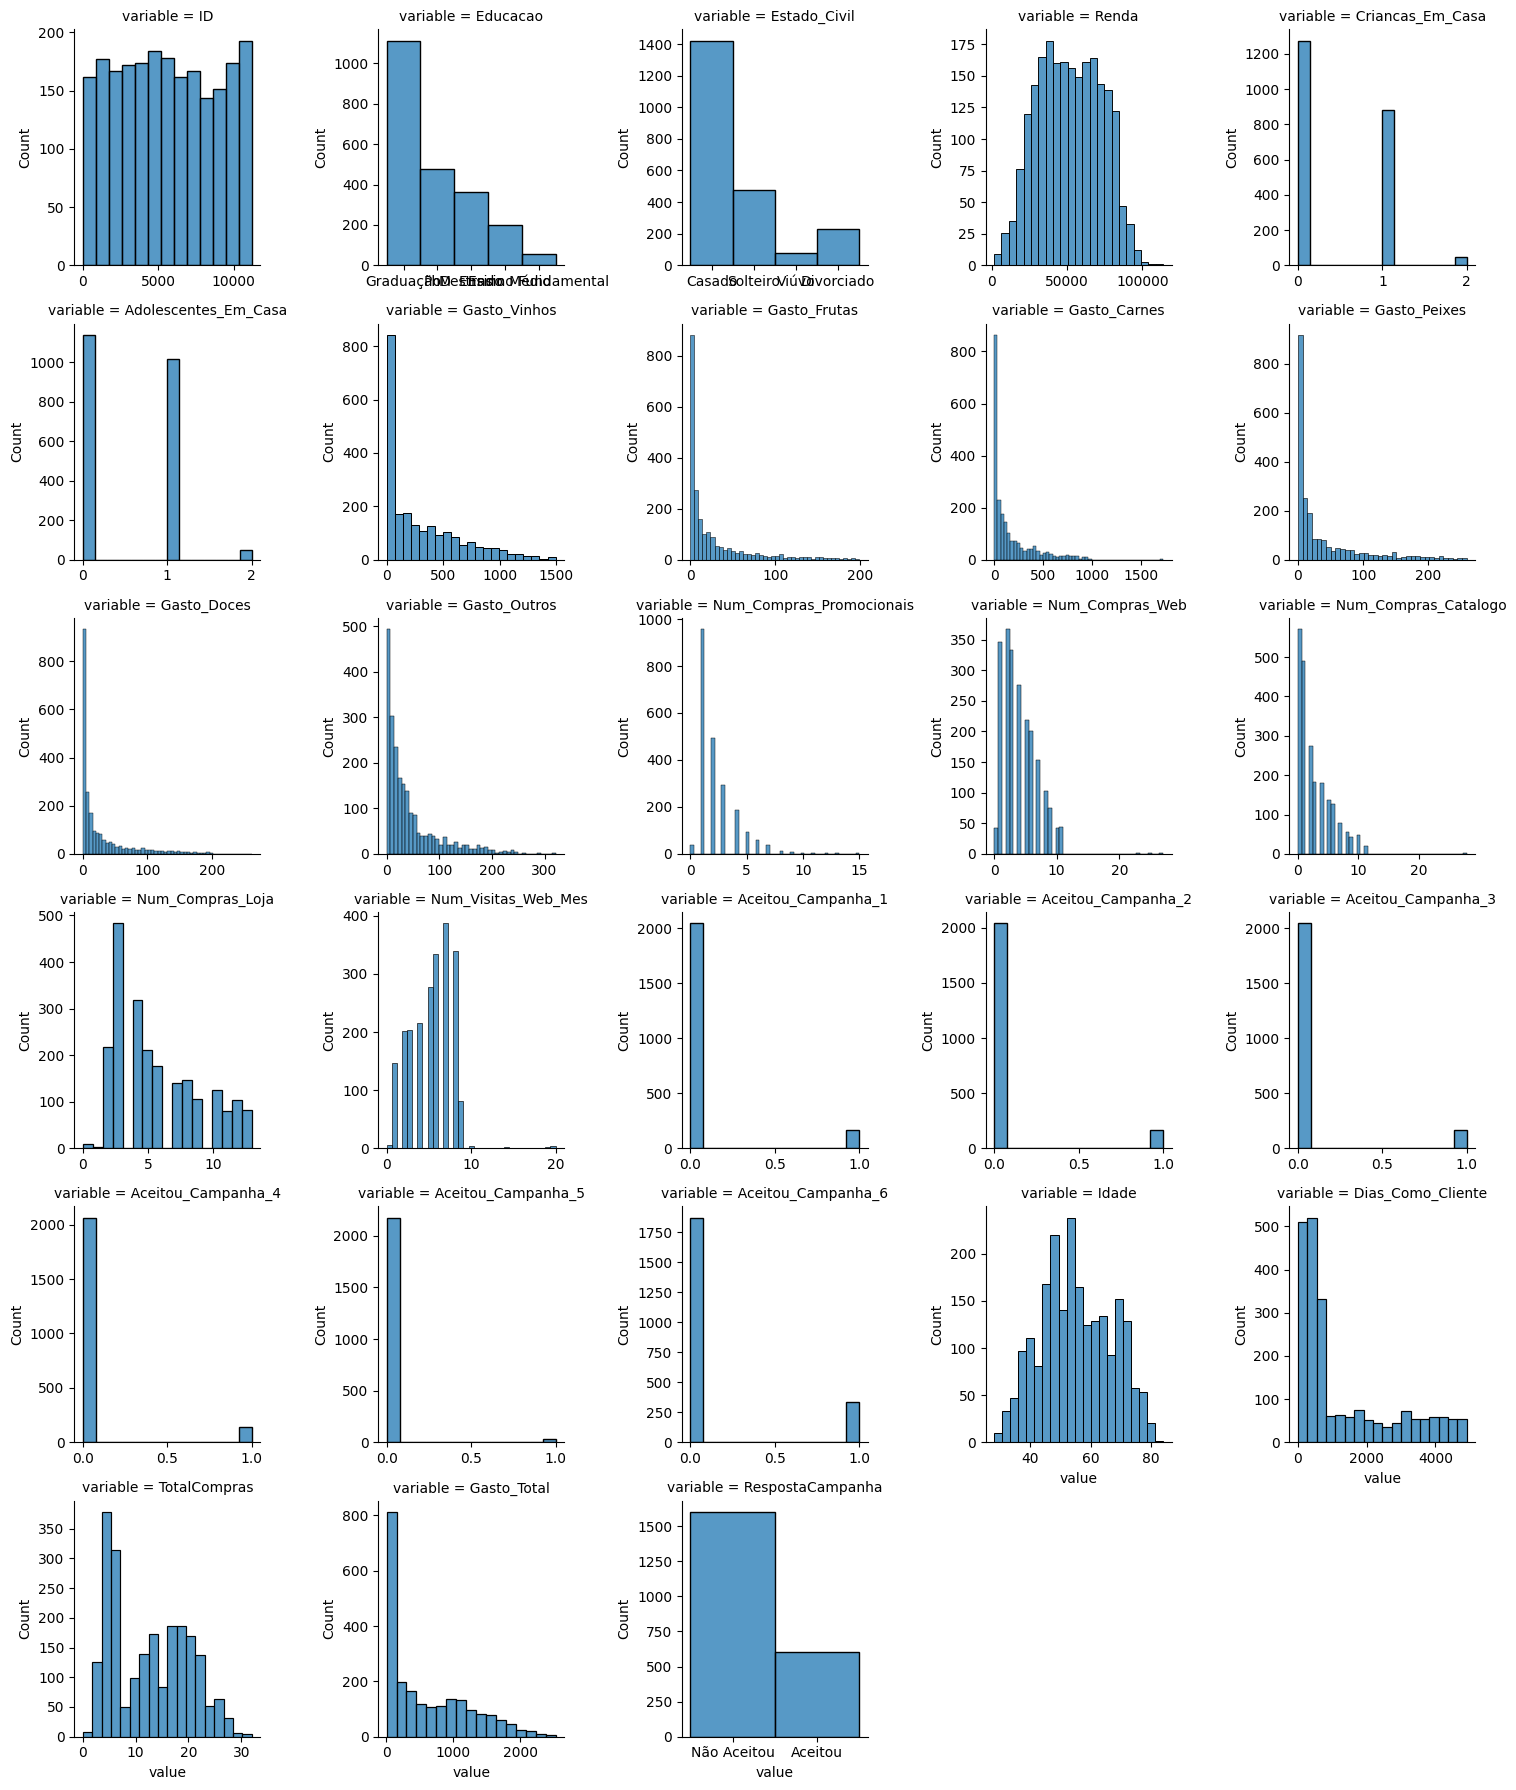

In [60]:
# Distribuição das Variáveis
hist = pd.melt(df, value_vars = df )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value')

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Verificando a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

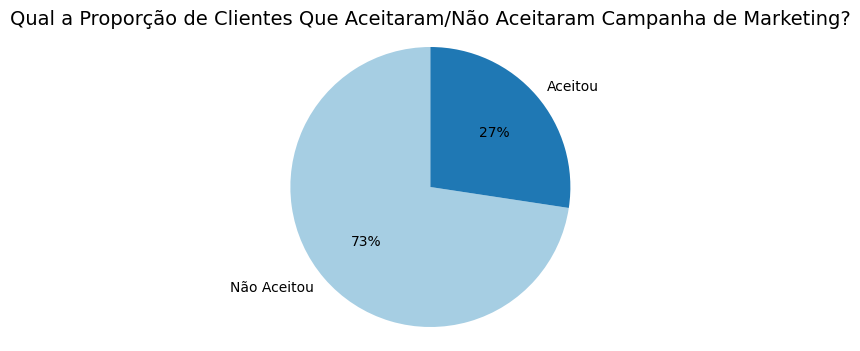

In [61]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (6, 4))

# Conta as ocorrências de cada resposta
counts = df['RespostaCampanha'].value_counts()
labels = counts.index.tolist()

# Paleta de cores
colors = sns.color_palette('Paired')

# Pie chart
ax.pie(counts, labels = labels, colors = colors, autopct = '%.0f%%', startangle = 90)

# Título
ax.set_title('Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?', fontsize = 14)

# Mantém os eixos iguais
ax.axis('equal')

# Display 
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando a taxa de sucesso das 6 campanhas </h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

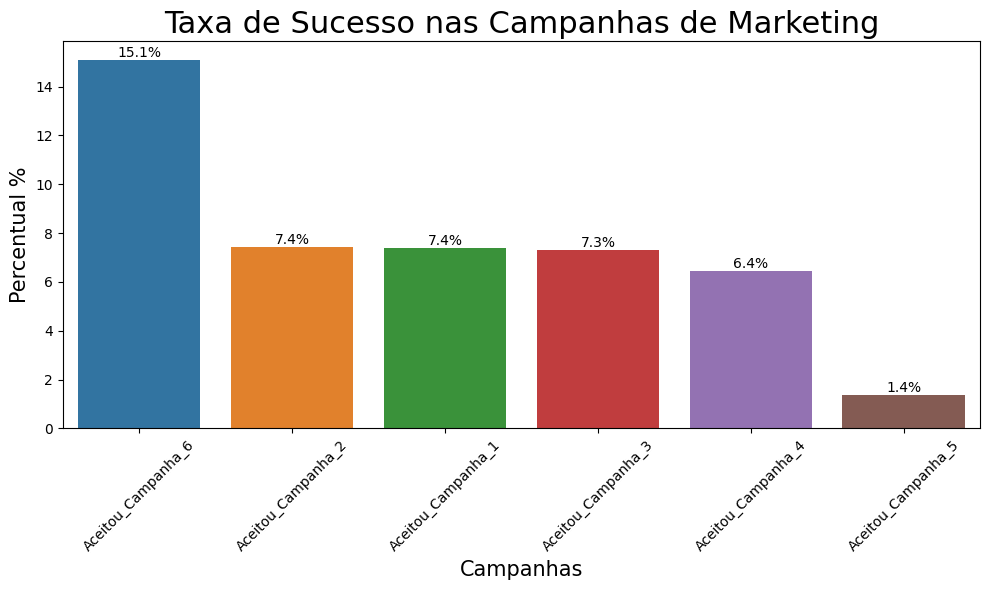

In [62]:
# Lista de campanhas
Campanhas = ['Aceitou_Campanha_1', 
             'Aceitou_Campanha_2', 
             'Aceitou_Campanha_3', 
             'Aceitou_Campanha_4', 
             'Aceitou_Campanha_5', 
             'Aceitou_Campanha_6']

# Calcula o percentual
campaigns = pd.DataFrame(df[Campanhas].mean() * 100, columns = ['Percent']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = campaigns.sort_values('Percent', ascending = False))

# Labels
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de Sucesso nas Campanhas de Marketing', size = 22)

# Inclui o percentual no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom')

# Inclina os rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Display 
plt.tight_layout()
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando se a idade tem influência nas decisões dos gostos dos clientes</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2205 non-null   int64  
 1   Educacao                  2205 non-null   object 
 2   Estado_Civil              2205 non-null   object 
 3   Renda                     2205 non-null   float64
 4   Criancas_Em_Casa          2205 non-null   int64  
 5   Adolescentes_Em_Casa      2205 non-null   int64  
 6   Gasto_Vinhos              2205 non-null   int64  
 7   Gasto_Frutas              2205 non-null   int64  
 8   Gasto_Carnes              2205 non-null   int64  
 9   Gasto_Peixes              2205 non-null   int64  
 10  Gasto_Doces               2205 non-null   int64  
 11  Gasto_Outros              2205 non-null   int64  
 12  Num_Compras_Promocionais  2205 non-null   int64  
 13  Num_Compras_Web           2205 non-null   int64  
 14  Num_Comp

In [64]:
# Filtra as colunas categóricas e calcula a correlação das colunas quantitativas
df_corr = df.drop(['ID',
                           'Educacao',
                           'Estado_Civil',
                           'Criancas_Em_Casa',
                           'Adolescentes_Em_Casa', 
                           'Aceitou_Campanha_1', 
                           'Aceitou_Campanha_2',
                           'Aceitou_Campanha_3', 
                           'Aceitou_Campanha_4', 
                           'Aceitou_Campanha_5',
                           'Aceitou_Campanha_6', 
                           'Educacao',
                           'RespostaCampanha'], axis = 1).corr()

In [65]:
column_corr = df_corr.loc['Idade']
column_corr

Renda                       0.212625
Gasto_Vinhos                0.164438
Gasto_Frutas                0.013149
Gasto_Carnes                0.041540
Gasto_Peixes                0.040855
Gasto_Doces                 0.021075
Gasto_Outros                0.059295
Num_Compras_Promocionais    0.072005
Num_Compras_Web             0.161839
Num_Compras_Catalogo        0.140724
Num_Compras_Loja            0.138614
Num_Visitas_Web_Mes        -0.122713
Idade                       1.000000
Dias_Como_Cliente           0.009321
TotalCompras                0.179130
Gasto_Total                 0.118404
Name: Idade, dtype: float64

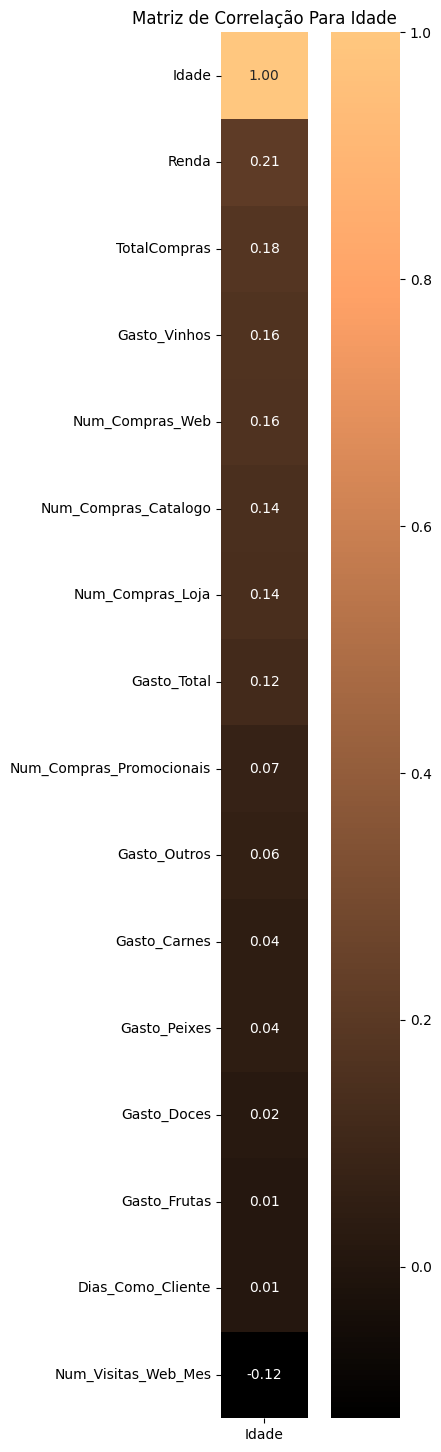

In [66]:
# visualizando as mesmas informações contidas na tabela acima de forma gráfica, pelo heatmap

# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando a Relação Entre Gasto Total e Resposta às Campanhas de Marketing</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

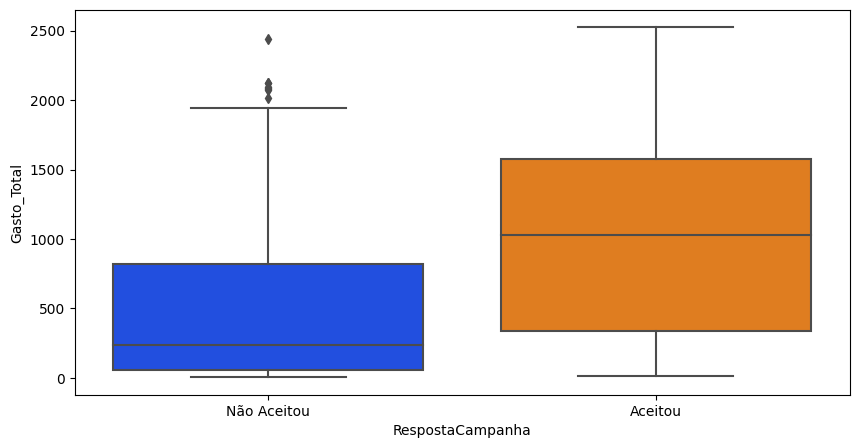

In [67]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Total', data = df, palette = 'bright');

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Verificando em qual categoria de produto os clientes gastam mais</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

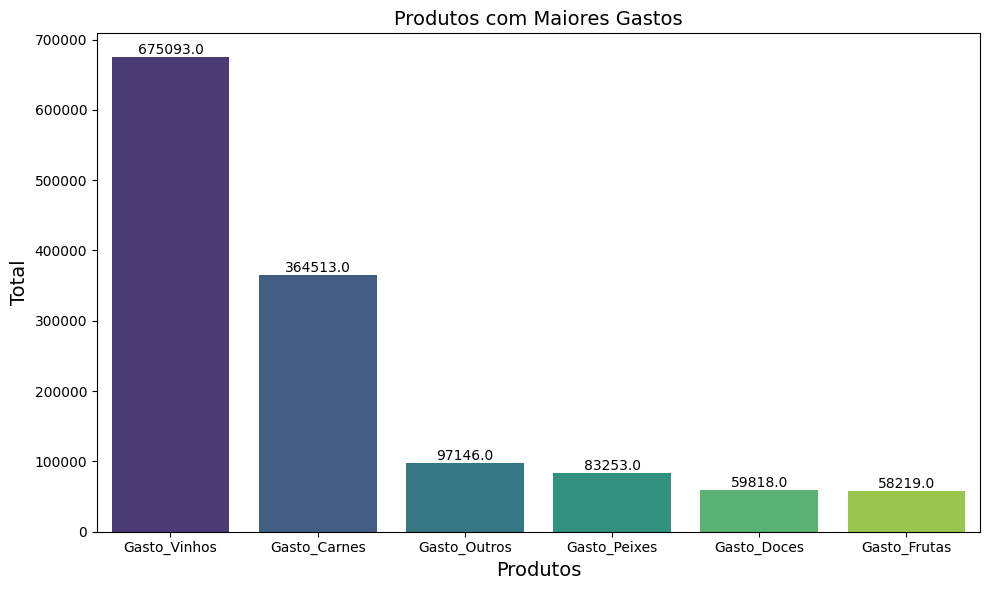

In [68]:
# Categorias de produtos
produtos = ['Gasto_Vinhos', 
            'Gasto_Frutas',
            'Gasto_Carnes', 
            'Gasto_Peixes',
            'Gasto_Doces',
            'Gasto_Outros']

# Cria o dataframe com os totais
df_produtos = pd.DataFrame(df[produtos].sum(), columns = ['Suma_Gastos']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Suma_Gastos', 
                 data = df_produtos.sort_values('Suma_Gastos', ascending = False), 
                 palette = 'viridis')

# Labels
plt.xlabel('Produtos', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Produtos com Maiores Gastos', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display 
plt.tight_layout()
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando a Relação Entre Gasto com Vinho e Resposta às Campanhas de Marketing</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

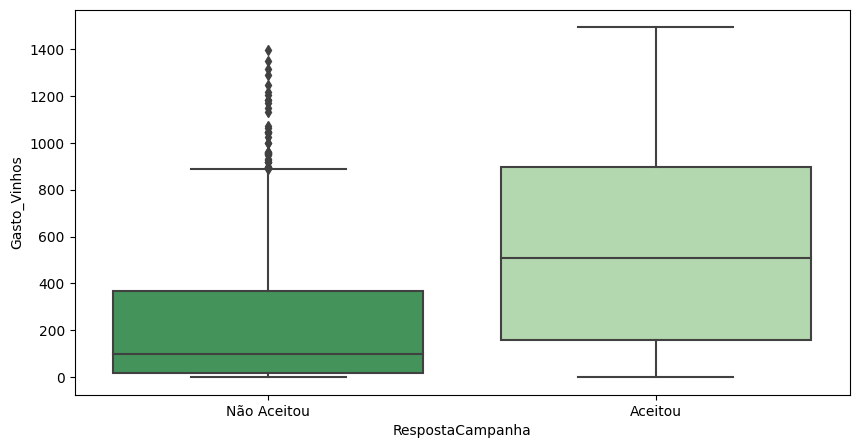

In [69]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Vinhos', data = df, palette = 'Greens_r');

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando a Relação Entre Renda e Resposta às Campanhas de Marketing</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

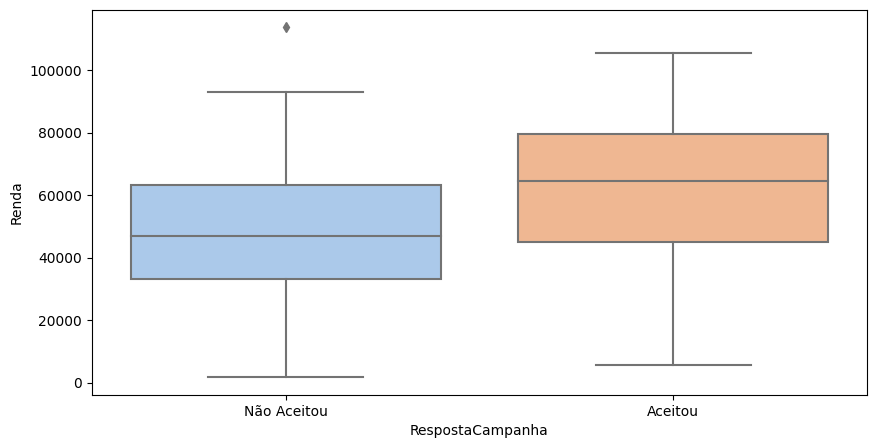

In [70]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Renda', data = df, palette = 'pastel');

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando a Relação Entre Renda e Gasto Total</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

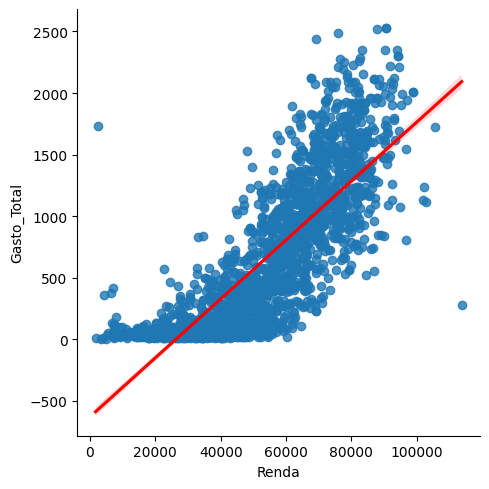

In [71]:
# Plot
sns.lmplot(x = 'Renda', y = 'Gasto_Total', data = df, palette = 'blue', line_kws = {'color': 'red'})

<p style="text-align: justify;">____________________________________________________________</p>

  <h4 style="text-align: justify;"> Analisando os Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Aceitar ou Não a Campanha</h4>
 

<p style="text-align: justify;">____________________________________________________________</p>

In [72]:
df.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,28,14,...,2,0,0,0,0,0,0,47,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,53,10,...,3,0,0,0,0,0,0,64,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,1,2,...,4,0,0,0,0,0,0,54,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,9,67,...,2,0,0,0,0,0,0,55,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,32,90,...,2,0,0,0,0,0,0,45,2665,19,758,Não Aceitou


In [73]:
# Converte as variáveis do tipo texto em representação numérica usando One-Hot Encoding
df_imp = pd.get_dummies(df, columns = ['Educacao', 'Estado_Civil'])

In [74]:
df_imp.columns

Index(['ID', 'Renda', 'Criancas_Em_Casa', 'Adolescentes_Em_Casa',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total', 'RespostaCampanha', 'Educacao_Ensino Fundamental',
       'Educacao_Ensino Médio', 'Educacao_Graduação', 'Educacao_Mestrado',
       'Educacao_PhD', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
       'Estado_Civil_Solteiro', 'Estado_Civil_Viúvo'],
      dtype='object')

In [75]:
df_imp.head()

,ID,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,Num_Compras_Promocionais,Num_Compras_Web,...,TotalCompras,Gasto_Total,RespostaCampanha,Educacao_Ensino Fundamental,Educacao_Ensino Médio,Educacao_Graduação,Educacao_Mestrado,Educacao_PhD,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Estado_Civil_Viúvo
0,9970,55375.0,0,1,42,11,57,10,28,14,1,1,...,8,162,Não Aceitou,0,0,1,0,0,1,0,0,0
1,4002,77037.0,0,1,463,96,333,168,53,10,1,7,...,26,1123,Não Aceitou,0,0,0,0,1,1,0,0,0
2,10914,24163.0,1,1,4,1,7,2,1,2,2,1,...,4,17,Não Aceitou,0,0,1,0,0,0,0,1,0
3,7279,69476.0,0,0,260,86,559,63,9,67,1,4,...,14,1044,Não Aceitou,0,0,0,0,1,1,0,0,0
4,10582,72063.0,0,1,180,32,348,76,32,90,2,5,...,19,758,Não Aceitou,0,0,1,0,0,1,0,0,0


In [76]:
# Vamos remover variáveis que seriam redundantes ou desnecessárias
# Como estamos criando X (dados de entrada) removemos RespostaCampanha (dados de saída)
X = df_imp.drop(['ID',
                     'Gasto_Vinhos', 
                     'Gasto_Frutas', 
                     'Gasto_Carnes', 
                     'Gasto_Peixes',
                     'Gasto_Doces', 
                     'Gasto_Outros',
                     'Num_Compras_Web', 
                     'Num_Compras_Catalogo', 
                     'Num_Compras_Loja',
                     'Aceitou_Campanha_1', 
                     'Aceitou_Campanha_2', 
                     'Aceitou_Campanha_3', 
                     'Aceitou_Campanha_4', 
                     'Aceitou_Campanha_5', 
                     'Aceitou_Campanha_6',
                     'RespostaCampanha'], axis = 1)

In [77]:
# Converte a variável em representação numérica
y = df_imp['RespostaCampanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

In [78]:
# Cria o modelo
modelo_rf = RandomForestClassifier(random_state = 43)      

In [79]:
# Treina o modelo
modelo_dsa = modelo_rf.fit(X,y)

In [80]:
# Extrai a importância de cada variável
importances = modelo_dsa.feature_importances_

In [81]:
# Desvio padrão das importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo_dsa.estimators_], axis = 0)

In [82]:
# Índices
indices = np.argsort(importances)

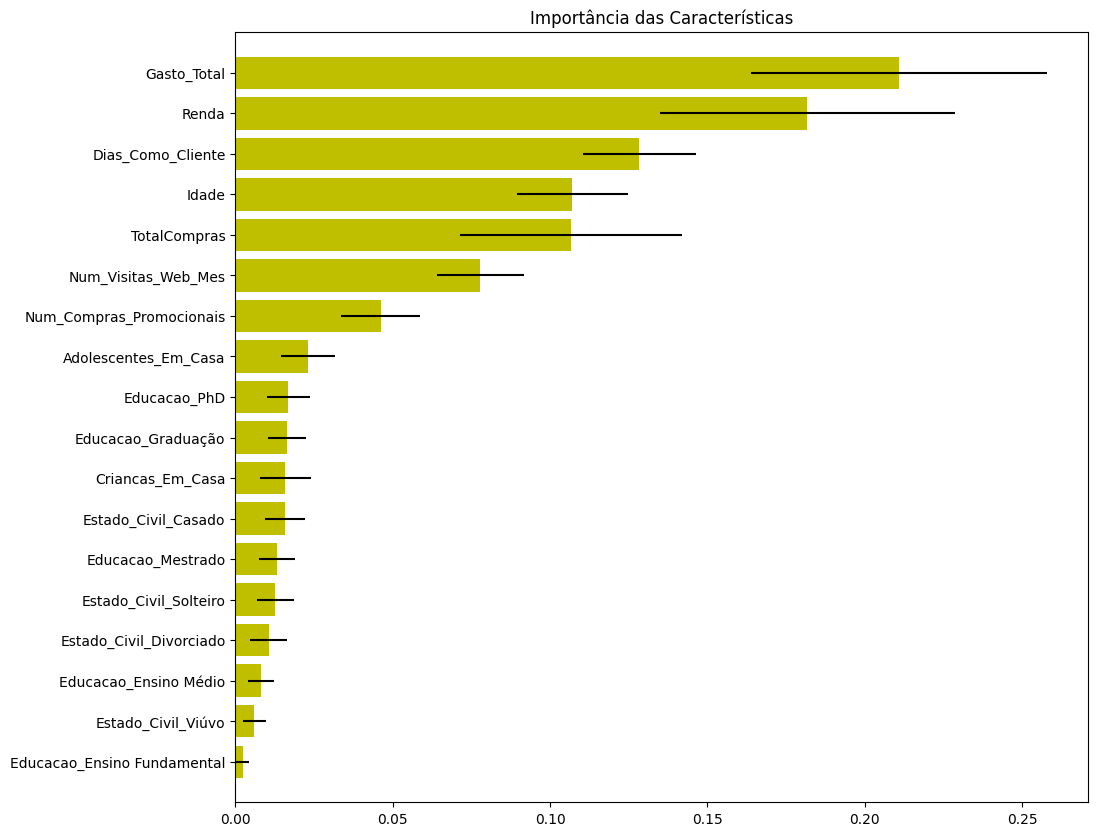

In [83]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

<h2 style="text-align: justify;"> Teste de Hipótese</h2>
 
<h4 style="text-align: justify;"> Nível educacional não parece ser relevante para explicar a resposta do cliente à campanha de Marketing. Por outro lado, Renda é bastante relevante. É provável que a média de renda seja diferente entre os níveis educacionais.</h4>    

<h4 style="text-align: justify;"> Testar a hipótese de que existe diferença significativa entre as médias de Renda dos clientes Com Ensino Superior e Sem Ensino Superior. Antes, vamos explorar essa relação.</h4>   

<p style="text-align: justify;">____________________________________________________________</p>

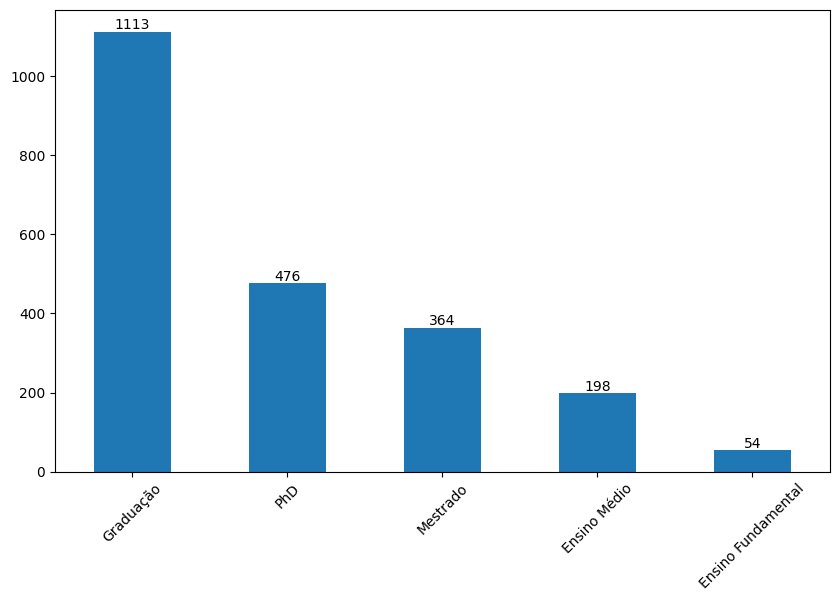

In [84]:
# Plot do total de clientes por nível educacional
plt.figure(figsize = (10, 6))
ax = df.Educacao.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

In [85]:
df.columns

Index(['ID', 'Educacao', 'Estado_Civil', 'Renda', 'Criancas_Em_Casa',
       'Adolescentes_Em_Casa', 'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes',
       'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1',
       'Aceitou_Campanha_2', 'Aceitou_Campanha_3', 'Aceitou_Campanha_4',
       'Aceitou_Campanha_5', 'Aceitou_Campanha_6', 'Idade',
       'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha'],
      dtype='object')

In [86]:
# Renda média por nível educacional
media_renda = df.groupby('Educacao')['Renda'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'Renda')
media_renda

,Educacao,Renda
0,Ensino Fundamental,20306.259259
1,Ensino Médio,47625.333333
2,Graduação,51984.008086
3,Mestrado,52629.579670
4,PhD,55220.581933


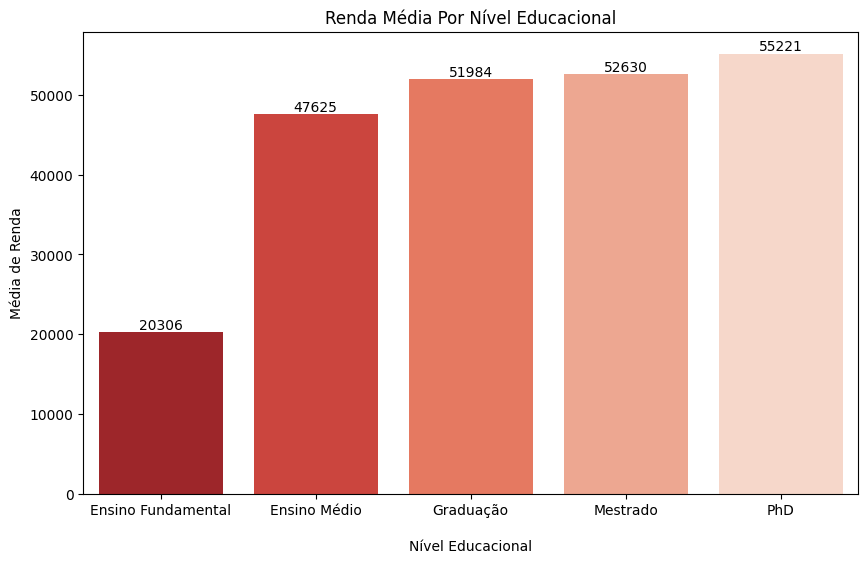

In [87]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['Educacao'], y = media_renda['Renda'], data = df, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

<p style="text-align: justify;">____________________________________________________________</p>

<h2 style="text-align: justify;"> Definindo as Hipóteses do Teste para Diferença de Gastos por Nível Educacional</h2>
 
<p style="text-align: justify;"> <b>Hipótese Nula (H0)</b>: A hipótese nula é uma declaração de "não diferença". Em nosso caso, ela afirma que "Não há diferença significativa nas médias de renda de grupos com e sem nível superior". Isso significa que qualquer diferença observada nos dados entre os grupos pode ser atribuída ao acaso.</p>   

<p style="text-align: justify;"> <b>Hipótese Alternativa (H1)</b>: A hipótese alternativa contrapõe a hipótese nula. Ela afirma que "Há uma diferença significativa nas médias de renda de grupos com e sem nível superior". Isso implica que as diferenças observadas são reais e não apenas resultado de variações aleatórias.</p>  

<p style="text-align: justify;">O resultado do teste (em especial, o valor-p) indica se devemos ou não rejeitar a hipótese nula, da seguinte forma:</p>


<p style="text-align: justify;"> <b>Valor-p Baixo (tipicamente < 0,05)</b>: Se o valor-p do teste for menor que o nível de significância escolhido (geralmente 0,05), rejeita-se a hipótese nula, sugerindo que há evidências suficientes para afirmar que existe uma diferença significativa nas médias de renda entre os grupos.</p>  

<p style="text-align: justify;"> <b>Valor-p Alto</b>: Se o valor-p for maior que o nível de significância, não é possível rejeitar a hipótese nula, indicando que não há evidências suficientes para afirmar que existe uma diferença significativa.</p>  

<p style="text-align: justify;">É importante lembrar que "não rejeitar a hipótese nula" não é o mesmo que provar que a hipótese nula é verdadeira. Significa apenas que, com os dados disponíveis, não há evidências suficientes para apoiar a hipótese alternativa.</p>

<p style="text-align: justify;">____________________________________________________________</p>

<h4 style="text-align: justify;">Para escolher o Teste de Hipóteses adequado para esse problema, precisamos verificar se as variáveis seguem ou não uma distribuição normal. Se as variáveis seguirem uma distribuição normal podemos usar um teste paramétrico. Caso contrário, devemos usar um teste não paramétrico.</h4>    

<p style="text-align: justify;">____________________________________________________________</p>

In [88]:
# Representação numérica da variável categórica
df['Educacao'] = df['Educacao'].map({'Ensino Fundamental':1,
                                             'Ensino Médio':2,
                                             'Graduação':3,
                                             'Mestrado':4,
                                             'PhD':5})

In [89]:
df.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,3,Casado,55375.0,0,1,42,11,57,10,28,14,...,2,0,0,0,0,0,0,47,255,8,162,Não Aceitou
1,4002,5,Casado,77037.0,0,1,463,96,333,168,53,10,...,3,0,0,0,0,0,0,64,259,26,1123,Não Aceitou
2,10914,3,Solteiro,24163.0,1,1,4,1,7,2,1,2,...,4,0,0,0,0,0,0,54,1294,4,17,Não Aceitou
3,7279,5,Casado,69476.0,0,0,260,86,559,63,9,67,...,2,0,0,0,0,0,0,55,272,14,1044,Não Aceitou
4,10582,3,Casado,72063.0,0,1,180,32,348,76,32,90,...,2,0,0,0,0,0,0,45,2665,19,758,Não Aceitou


In [90]:
# Dados que serão testados
dados_para_testar = df[['Renda', 'Educacao']]

In [91]:
dados_para_testar.head()

,Renda,Educacao
0,55375.0,3
1,77037.0,5
2,24163.0,3
3,69476.0,5
4,72063.0,3


<p style="text-align: justify;">____________________________________________________________</p>

<h2 style="text-align: justify;"> Aplicando o Teste de Normalidade Para Selecionar o Teste de Hipóteses Adequado</h2>

<p style="text-align: justify;">O Teste de Shapiro-Wilk é um teste estatístico usado para avaliar a normalidade de uma distribuição de dados. Este teste é especialmente útil para amostras pequenas (geralmente, menos de 50 observações), embora também possa ser aplicado a conjuntos de dados maiores. As hipóteses para o Teste de Shapiro-Wilk são formuladas da seguinte forma:</p>
 
<p style="text-align: justify;"> <b>Hipótese Nula (H0)</b>: A hipótese nula do Teste de Shapiro-Wilk afirma que os dados seguem uma distribuição normal. Em outras palavras, assume-se que a distribuição da amostra em questão não difere significativamente de uma distribuição normal teórica.</p>   

<p style="text-align: justify;"> <b>Hipótese Alternativa (H1)</b>: A hipótese alternativa é que os dados não seguem uma distribuição normal. Isso significa que há evidências suficientes nos dados para sugerir que a distribuição se desvia da normalidade.</p>  

<p style="text-align: justify;">O resultado do teste (em especial, o valor-p) indica se devemos ou não rejeitar a hipótese nula, da seguinte forma:</p>

<p style="text-align: justify;"> <b>Valor-p Baixo (tipicamente < 0,05)</b>: Rejeita-se a hipótese nula, sugerindo que os dados não vêm de uma distribuição normal.</p>  

<p style="text-align: justify;"> <b>Valor-p Alto</b>: Aceita a hipótese nula, o que indica que não há evidências suficientes para afirmar que os dados não seguem uma distribuição normal.</p>  

<p style="text-align: justify;"> É importante notar que o Teste de Shapiro-Wilk, como outros testes de normalidade, pode ser sensível ao tamanho da amostra. Com amostras muito grandes, o teste pode detectar pequenos desvios da normalidade que podem não ser relevantes na prática. Por outro lado, em amostras muito pequenas, o teste pode não ter poder suficiente para detectar desvios significativos da normalidade.</p>  

<p style="text-align: justify;">____________________________________________________________</p>

In [92]:
# Teste Shapiro-Wilk 
def dsa_testa_normal(columns):
    
    for column in columns:
        
        statistic, p_value = shapiro(dados_para_testar[column])

        alpha = 0.05
        
        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falhamos em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

In [93]:
dsa_testa_normal(dados_para_testar)


Renda: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

Educacao: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


<p style="text-align: justify;">____________________________________________________________</p>

<h2 style="text-align: justify;"> Aplicando o Teste Não Paramétrico</h2>

<p style="text-align: justify;">O teste de Mann-Whitney U é uma técnica estatística usada para comparar diferenças entre dois grupos independentes quando os dados não seguem necessariamente uma distribuição normal. Este teste é uma alternativa não paramétrica ao teste t de Student para amostras independentes e é frequentemente usado quando as condições para o teste t não são atendidas (por exemplo, quando a distribuição dos dados é significativamente não normal).</p>
 
<p style="text-align: justify;">____________________________________________________________</p>

In [94]:
# Criando os grupos
grupo_com_graduacao = df[df['Educacao'].isin([5, 4, 3])]['Renda']
grupo_sem_graduacao = df[df['Educacao'].isin([1, 2])]['Renda']

In [95]:
# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_com_graduacao, grupo_sem_graduacao)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda.")

Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.


<p style="text-align: justify;">____________________________________________________________</p>

<h2 style="text-align: justify;"> Conclusão</h2>

<p style="text-align: justify;">Os fatores mais relevantes que explicam a resposta dos clientes às campanhas de Marketing são o histórico de gasto total, a renda, o tempo total como cliente, idade e total de compras anteriores. Ou seja, clientes fiéis estão mais propensos a aceitar campanhas de Marketing.</p>

<p style="text-align: justify;">O nível educacional e o estado civil não parecem ser fatores relevantes para explicar a resposta à campanha de Marketing. Decidimos então aplicar um teste de hipóteses.</p>

<p style="text-align: justify;">Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem graduação, ficou evidente que existe diferença. Vimos ainda que níveis educacionais mais altos têm média de renda maior.</p>

<p style="text-align: justify;">Logo, a empresa deveria segmentar suas campanhas de Marketing para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional, considerando ainda histórico de gasto total, o tempo total como cliente, idade e total de compras anteriores.</p>
 
<p style="text-align: justify;">____________________________________________________________</p>


In [96]:
%reload_ext watermark
%watermark -a "Michela Camboim"

Author: Michela Camboim



In [97]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.15.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [98]:
%watermark --iversions

sklearn   : 1.5.1
scipy     : 1.10.1
pandas    : 1.5.3
numpy     : 1.25.2
missingno : 0.5.2
matplotlib: 3.6.0
seaborn   : 0.12.2

